In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [87]:
data = pd.read_csv("Data/train.csv")
data

ACTION  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0           1     39353   85475         117961         118300         123472   
1           1     17183    1540         117961         118343         123125   
2           1     36724   14457         118219         118220         117884   
3           1     36135    5396         117961         118343         119993   
4           1     42680    5905         117929         117930         119569   
...       ...       ...     ...            ...            ...            ...   
32764       1     23497   16971         117961         118300         119993   
32765       1     25139  311198          91261         118026         122392   
32766       1     34924   28805         117961         118327         120299   
32767       1     80574   55643         118256         118257         117945   
32768       1     14354   59575         117916         118150         117920   

       ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0          117905            117906       290919     117908  
1          118536            118536       308574     118539  
2          117879            267952        19721     117880  
3          118321            240983       290919     118322  
4          119323            123932        19793     119325  
...           ...               ...          ...        ...  
32764      118321            240983       290919     118322  
32765      121143            173805       249618     121145  
32766      124922            152038       118612     124924  
32767      280788            280788       292795     119082  
32768      118568            122142        19721     118570  

[32769 rows x 10 columns]

In [88]:
data.shape

(32769, 10)

In [89]:
data.describe()

ACTION       RESOURCE         MGR_ID  ROLE_ROLLUP_1  \
count  32769.000000   32769.000000   32769.000000   32769.000000   
mean       0.942110   42923.916171   25988.957979  116952.627788   
std        0.233539   34173.892702   35928.031650   10875.563591   
min        0.000000       0.000000      25.000000    4292.000000   
25%        1.000000   20299.000000    4566.000000  117961.000000   
50%        1.000000   35376.000000   13545.000000  117961.000000   
75%        1.000000   74189.000000   42034.000000  117961.000000   
max        1.000000  312153.000000  311696.000000  311178.000000   

       ROLE_ROLLUP_2  ROLE_DEPTNAME     ROLE_TITLE  ROLE_FAMILY_DESC  \
count   32769.000000   32769.000000   32769.000000      32769.000000   
mean   118301.823156  118912.779914  125916.152644     170178.369648   
std      4551.588572   18961.322917   31036.465825      69509.462130   
min     23779.000000    4674.000000  117879.000000       4673.000000   
25%    118102.000000  118395.000000  118274.000000     117906.000000   
50%    118300.000000  118921.000000  118568.000000     128696.000000   
75%    118386.000000  120535.000000  120006.000000     235280.000000   
max    286791.000000  286792.000000  311867.000000     311867.000000   

         ROLE_FAMILY      ROLE_CODE  
count   32769.000000   32769.000000  
mean   183703.408893  119789.430132  
std    100488.407413    5784.275516  
min      3130.000000  117880.000000  
25%    118363.000000  118232.000000  
50%    119006.000000  118570.000000  
75%    290919.000000  119348.000000  
max    308574.000000  270691.000000

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


<AxesSubplot:>

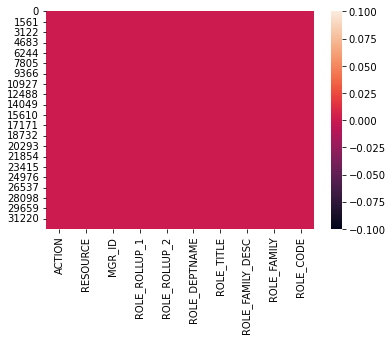

In [91]:
sns.heatmap(data.isnull())

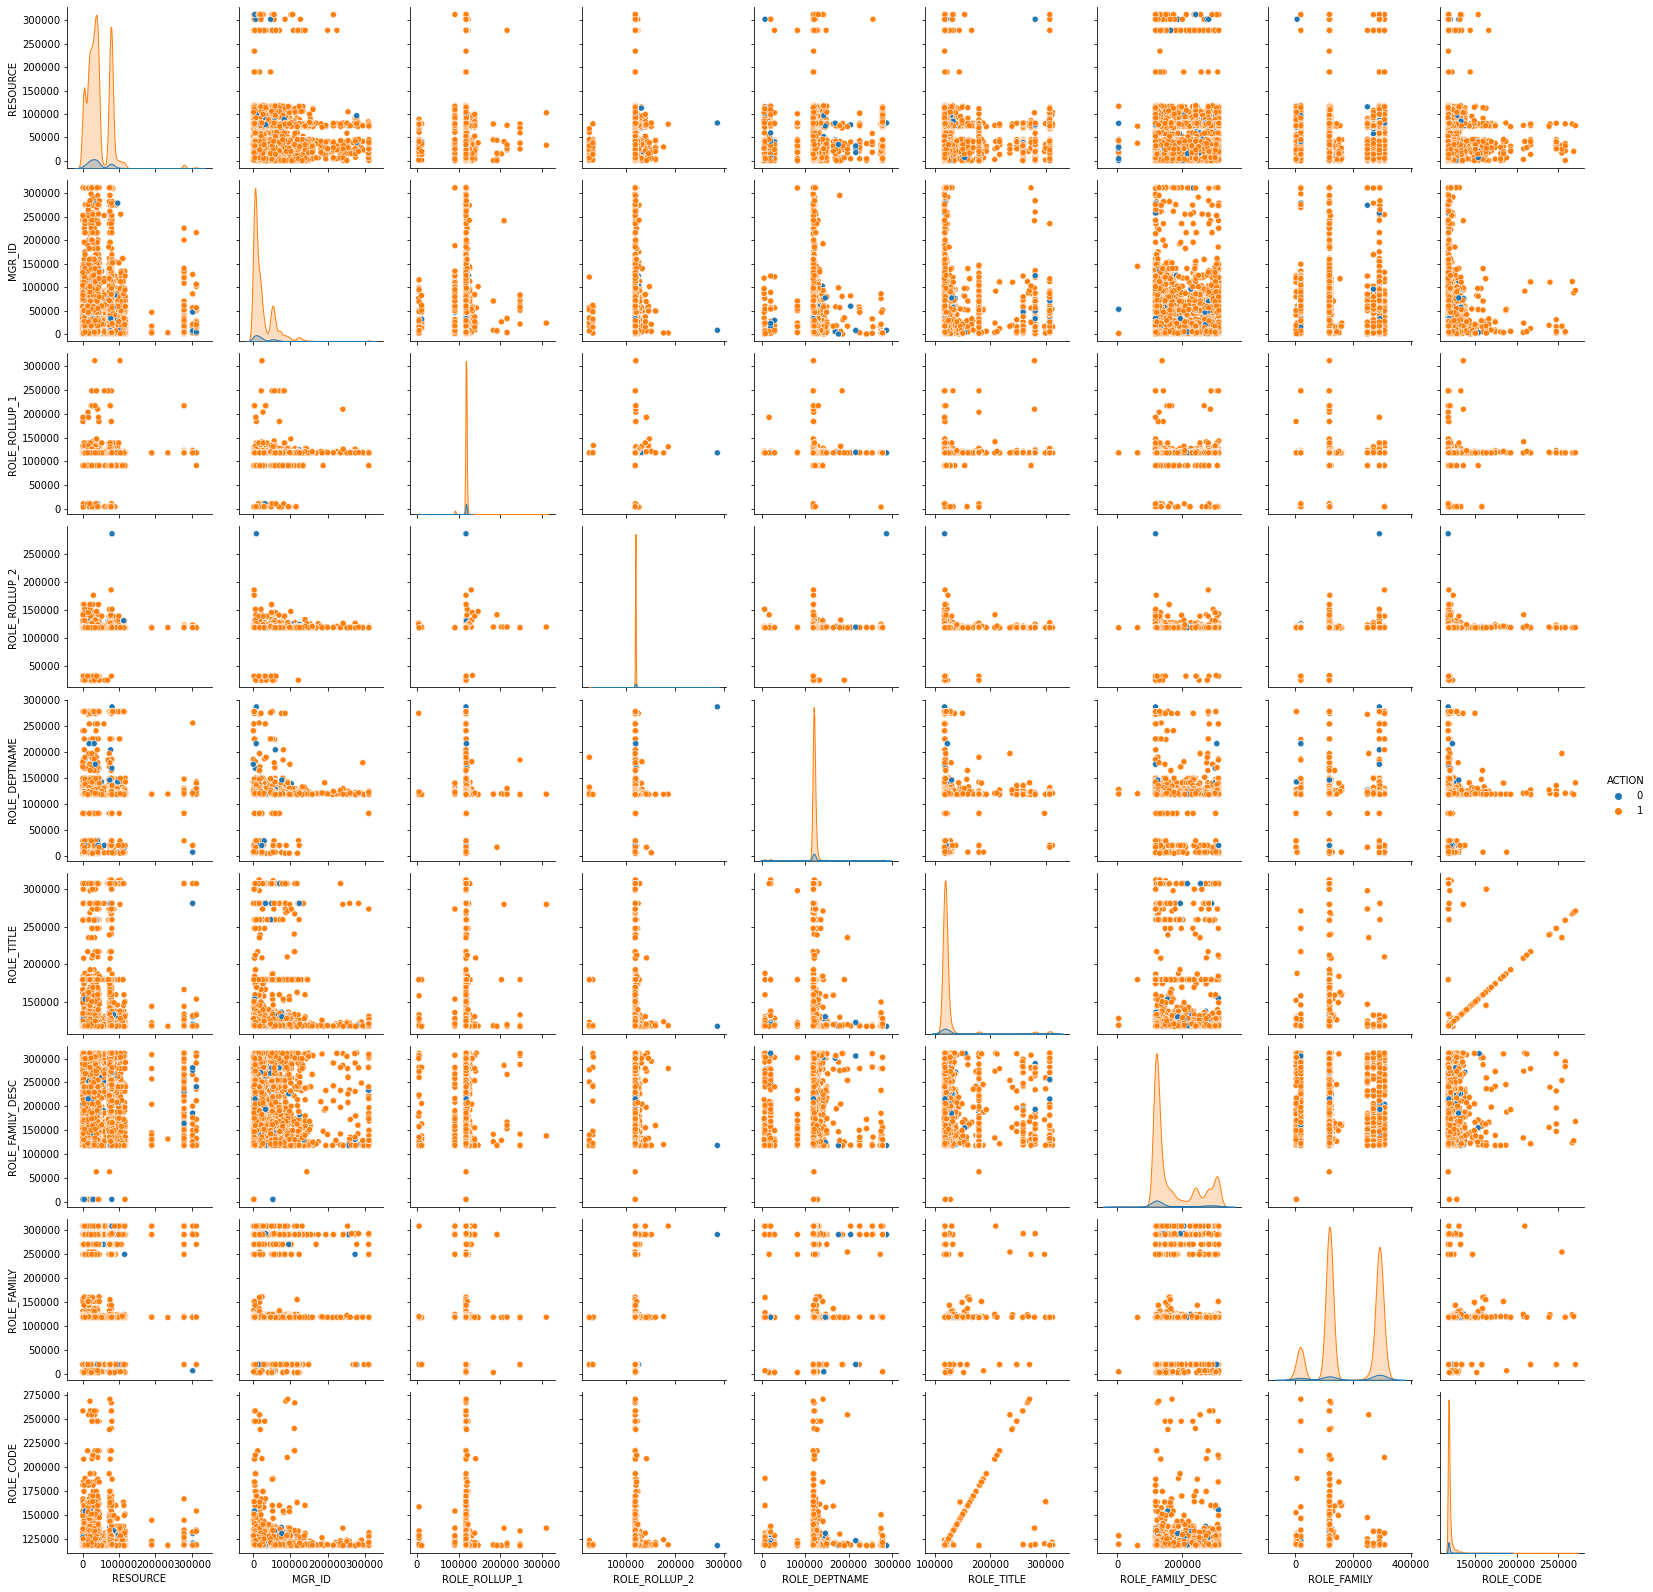

In [92]:
#no null values
sns.pairplot(data, hue='ACTION')

<AxesSubplot:>

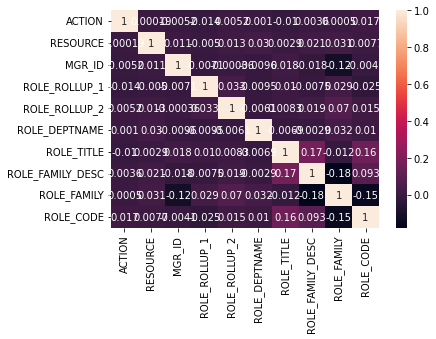

In [93]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)

<AxesSubplot:xlabel='ROLE_FAMILY_DESC', ylabel='ROLE_FAMILY'>

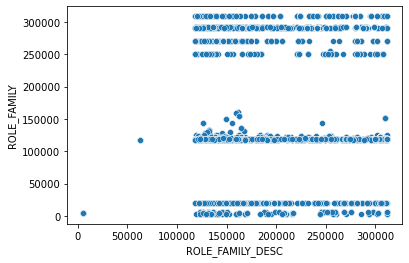

In [94]:
sns.scatterplot(x='ROLE_FAMILY_DESC',y='ROLE_FAMILY',data=data)

<AxesSubplot:xlabel='ROLE_CODE', ylabel='ROLE_FAMILY'>

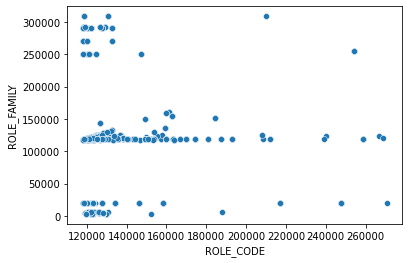

In [95]:
sns.scatterplot(x='ROLE_CODE',y='ROLE_FAMILY',data=data)

In [96]:
data.columns

Index(['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE'],
      dtype='object')

<AxesSubplot:xlabel='ROLE_CODE', ylabel='ROLE_TITLE'>

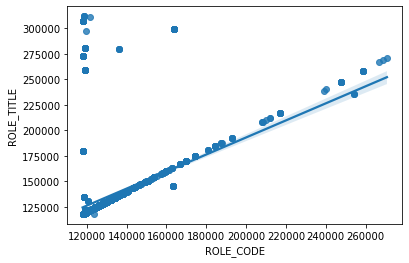

In [97]:
sns.regplot(x='ROLE_CODE',y='ROLE_TITLE',data=data)

In [98]:
np.set_printoptions(threshold=np.inf)

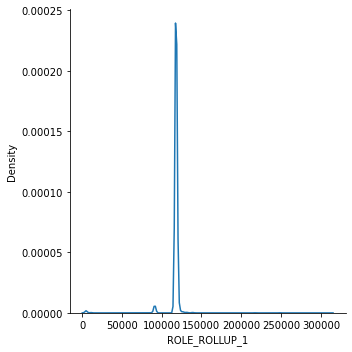

In [99]:
sns.displot(data=data, x="ROLE_ROLLUP_1", kind="kde")

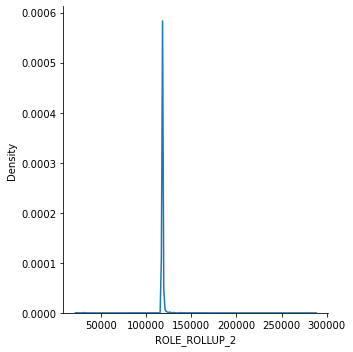

In [100]:
sns.displot(data=data, x="ROLE_ROLLUP_2", kind="kde")

([<matplotlib.patches.Wedge at 0x7f03b9012400>,
 [Text(-1.0818585071578481, 0.1989526840487273, 'True'),
  Text(1.0818585211283163, -0.19895260808054904, 'False')])

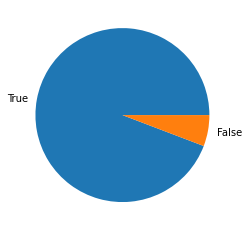

In [131]:
plt.pie(data['ACTION'].value_counts(), labels=['True','False'])

In [191]:
#This is a highly imbalanced dataset
#let us try over sampling
# class count
class_count_1, class_count_0 = data['ACTION'].value_counts()

# Separate class
class_0 = data[data['ACTION'] == 0]
class_1 = data[data['ACTION'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1897, 10)
class 1: (30872, 10)


In [193]:
class_0_over = class_0.sample(class_count_1, replace=True)
test_over = pd.concat([class_0_over, class_1], axis=0)
test_over

ACTION  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
29950       0     75787   49064         118555         118178         118556   
9292        0     73495   51345         117961         118052         120417   
2268        0     38738   19642         117961         118413         118481   
11258       0     15927    2437         118290         118291          19772   
26712       0     20222   57680         118256         118257         117945   
...       ...       ...     ...            ...            ...            ...   
32764       1     23497   16971         117961         118300         119993   
32765       1     25139  311198          91261         118026         122392   
32766       1     34924   28805         117961         118327         120299   
32767       1     80574   55643         118256         118257         117945   
32768       1     14354   59575         117916         118150         117920   

       ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
29950      117946            118557       292795     117948  
9292       118702            125047       118704     118705  
2268       118321            117906       290919     118322  
11258      126085            253147       119221     126087  
26712      117946            119235       292795     117948  
...           ...               ...          ...        ...  
32764      118321            240983       290919     118322  
32765      121143            173805       249618     121145  
32766      124922            152038       118612     124924  
32767      280788            280788       292795     119082  
32768      118568            122142        19721     118570  

[61744 rows x 10 columns]

In [194]:
X = test_over.iloc[:,1:].values
y = test_over.iloc[:,0].values

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [196]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [197]:
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5
y_pred

array([False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True,  True,  True, False,  True, False, False,
        True,  True, False,  True, False, False,  True, False,  True,
       False,  True, False,  True, False, False, False,  True, False,
       False, False, False, False,  True,  True, False,  True,  True,
       False, False,  True,  True, False, False,  True,  True, False,
        True,  True,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True,  True, False,  True, False, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
       False, False,  True,  True, False,  True, False,  True, False,
        True, False, False,  True,  True, False, False,  True,  True,
        True,  True, False, False, False,  True, False, False,  True,
       False, False, False, False,  True, False, False,  True, False,
        True, False,

In [198]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[7613    0]
 [ 260 7563]]
0.9831562580979528


In [199]:
test_data = pd.read_csv('Data/test.csv')
test_data

id  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0          1     78766   72734         118079         118080         117878   
1          2     40644    4378         117961         118327         118507   
2          3     75443    2395         117961         118300         119488   
3          4     43219   19986         117961         118225         118403   
4          5     42093   50015         117961         118343         119598   
...      ...       ...     ...            ...            ...            ...   
58916  58917     75078    4565         117961         118386         121961   
58917  58918      6977   72209         117961         118225         124948   
58918  58919     39262    6114         117961         118343           6104   
58919  58920      1023    8674         117961         118327         120318   
58920  58921     44977    3918         117961         118343         118660   

       ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0          117879            118177        19721     117880  
1          118863            122008       118398     118865  
2          118172            301534       249618     118175  
3          120773            136187       118960     120774  
4          118422            300136       118424     118425  
...           ...               ...          ...        ...  
58916      118784            117906       290919     118786  
58917      118054            118054       117887     118055  
58918      118278            118260       290919     118279  
58919      118321            117906       290919     118322  
58920      119433            133686       118424     119435  

[58921 rows x 10 columns]

In [200]:
ids = test_data['id']
test_data = test_data.drop(['id'], axis =1)

In [201]:
X_t = test_data.values

In [202]:
X_t

array([[ 78766,  72734, 118079, 118080, 117878, 117879, 118177,  19721,
        117880],
       [ 40644,   4378, 117961, 118327, 118507, 118863, 122008, 118398,
        118865],
       [ 75443,   2395, 117961, 118300, 119488, 118172, 301534, 249618,
        118175],
       [ 43219,  19986, 117961, 118225, 118403, 120773, 136187, 118960,
        120774],
       [ 42093,  50015, 117961, 118343, 119598, 118422, 300136, 118424,
        118425],
       [ 44722,   1755, 117961, 117962, 119223, 125793, 146749, 118643,
        125795],
       [ 75834,  21135, 117961, 118343, 123494, 118054, 118054, 117887,
        118055],
       [  4675,   3077, 117961, 118300, 120312, 124194, 124195, 118363,
        124196],
       [ 18072,  15575, 117902, 118041, 118623, 280788, 280788, 292795,
        119082],
       [ 22680,   4474, 117961, 118446, 119064, 118321, 118448, 290919,
        118322],
       [ 23150,  25293, 117961, 118386, 128823, 118321, 117906, 290919,
        118322],
       [ 80179,   622

In [203]:
y_p = classifier.predict(X_t)
y_p

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [204]:
submission = pd.DataFrame({'Id':ids, "Action":y_p})
submission

Id  Action
0          1       1
1          2       1
2          3       1
3          4       1
4          5       1
...      ...     ...
58916  58917       1
58917  58918       1
58918  58919       1
58919  58920       1
58920  58921       1

[58921 rows x 2 columns]

In [205]:
submission.to_csv('submission2.csv',index=False)

In [212]:
#let us also try out a boosting algorithm
import xgboost as xgb

In [213]:
xg_c = xgb.XGBClassifier(objective='binary:logistic')

In [214]:
xg_c.fit(X_train, y_train)

/home/shivam/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:56:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [215]:
y_pred = xg_c.predict(X_test)
y_pred = y_pred > 0.5
y_pred

array([False,  True, False,  True,  True, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True,  True,  True, False,  True, False, False,
        True,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True, False, False, False, False,  True, False,
       False, False,  True, False,  True,  True, False,  True,  True,
       False, False,  True,  True, False, False, False,  True, False,
        True,  True,  True, False,  True, False,  True, False,  True,
       False, False, False,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True, False, False,  True,  True,
       False, False,  True,  True, False,  True, False,  True, False,
        True, False, False,  True,  True, False, False,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False,  True, False,
        True, False,

In [216]:
print(accuracy_score(y_test, y_pred))

0.9348924591863177


In [217]:
y_p = xg_c.predict(X_t)
y_p

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,

In [218]:
submission2 = pd.DataFrame({'Id':ids, "Action":y_p})
submission2

Id  Action
0          1       1
1          2       1
2          3       1
3          4       1
4          5       1
...      ...     ...
58916  58917       1
58917  58918       1
58918  58919       1
58919  58920       1
58920  58921       1

[58921 rows x 2 columns]

In [219]:
submission.to_csv('submission3.csv',index=False)